In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt

In [2]:
tn = gpd.read_file('../data/TN/tl_2018_47_tract.shp')
tnroof = pd.read_csv('../data/tnroof.csv', dtype={0:'str'})
metros = gpd.read_file('../data/metro/tl_2020_us_uac10.shp')

In [3]:
tn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1497 non-null   object  
 1   COUNTYFP  1497 non-null   object  
 2   TRACTCE   1497 non-null   object  
 3   GEOID     1497 non-null   object  
 4   NAME      1497 non-null   object  
 5   NAMELSAD  1497 non-null   object  
 6   MTFCC     1497 non-null   object  
 7   FUNCSTAT  1497 non-null   object  
 8   ALAND     1497 non-null   int64   
 9   AWATER    1497 non-null   int64   
 10  INTPTLAT  1497 non-null   object  
 11  INTPTLON  1497 non-null   object  
 12  geometry  1497 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 152.2+ KB


In [4]:
tn.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [5]:
tnroof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           1030 non-null   object 
 1   state_name                            1030 non-null   object 
 2   lat_max                               1030 non-null   float64
 3   lat_min                               1030 non-null   float64
 4   lng_max                               1030 non-null   float64
 5   lng_min                               1030 non-null   float64
 6   lat_avg                               1030 non-null   float64
 7   lng_avg                               1030 non-null   float64
 8   yearly_sunlight_kwh_kw_threshold_avg  950 non-null    float64
 9   count_qualified                       1030 non-null   int64  
 10  percent_covered                       1030 non-null   float64
 11  percent_qualified

In [6]:
tnroof['center_point'] = gpd.GeoSeries.from_wkt(tnroof['center_point'])

In [7]:
tnroof = gpd.GeoDataFrame(tnroof, crs=tn.crs, geometry='center_point')

In [8]:
type(tnroof)

geopandas.geodataframe.GeoDataFrame

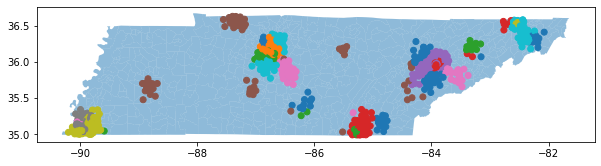

In [9]:
axis = tn.plot(figsize = (10,10), alpha=0.5)
tnroof.plot(ax=axis, column='region_name')
plt.show()

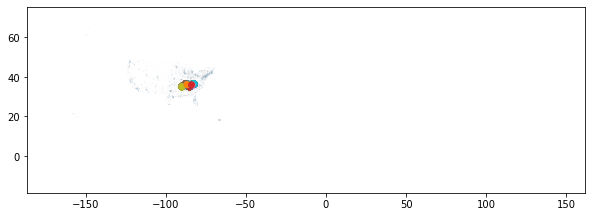

In [10]:
axis = metros.plot(figsize = (10,10), alpha=0.5)
tnroof.plot(ax=axis, column='region_name')
plt.show()

In [11]:
metros.head()

,UACE10,GEOID10,NAME10,NAMELSAD10,LSAD10,MTFCC10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,24310,24310,"Dixon, IL","Dixon, IL Urban Cluster",76,G3500,C,S,25562730,938057,+41.8529507,-089.4817439,"POLYGON ((-89.49859 41.85467, -89.49858 41.855..."
1,27847,27847,"Escanaba, MI","Escanaba, MI Urban Cluster",76,G3500,C,S,46643391,283456,+45.7274565,-087.0824457,"MULTIPOLYGON (((-87.09519 45.79692, -87.09496 ..."
2,18100,18100,"Clintonville, WI","Clintonville, WI Urban Cluster",76,G3500,C,S,5854687,502563,+44.6232203,-088.7611283,"POLYGON ((-88.78650 44.62996, -88.78574 44.630..."
3,06166,06166,"Bedford, IN","Bedford, IN Urban Cluster",76,G3500,C,S,30413950,2314,+38.8566530,-086.5012383,"MULTIPOLYGON (((-86.52020 38.86783, -86.52016 ..."
4,75270,75270,"Riverdale, CA","Riverdale, CA Urban Cluster",76,G3500,C,S,2306821,0,+36.4310710,-119.8620544,"POLYGON ((-119.86913 36.43083, -119.87093 36.4..."


In [12]:
tn

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,157,007300,47157007300,73,Census Tract 73,G5020,S,1917129,0,+35.1209841,-089.9363799,"POLYGON ((-89.94575 35.11532, -89.94575 35.115..."
1,47,157,021320,47157021320,213.20,Census Tract 213.20,G5020,S,5881320,43891,+35.0925659,-089.8492010,"POLYGON ((-89.87095 35.08952, -89.87077 35.089..."
2,47,157,020222,47157020222,202.22,Census Tract 202.22,G5020,S,34766729,0,+35.2950808,-089.8785477,"POLYGON ((-89.92943 35.26299, -89.92943 35.263..."
3,47,157,022410,47157022410,224.10,Census Tract 224.10,G5020,S,13072034,431366,+35.0111662,-090.0901823,"POLYGON ((-90.12761 34.99468, -90.12732 34.994..."
4,47,157,005300,47157005300,53,Census Tract 53,G5020,S,5967146,497369,+35.0930408,-090.0757059,"POLYGON ((-90.09169 35.08469, -90.09140 35.085..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,47,165,021107,47165021107,211.07,Census Tract 211.07,G5020,S,4283184,1241744,+36.2818729,-086.6100090,"POLYGON ((-86.62346 36.28037, -86.62344 36.280..."
1493,47,165,021008,47165021008,210.08,Census Tract 210.08,G5020,S,17750754,157341,+36.3481125,-086.5647003,"POLYGON ((-86.59451 36.35010, -86.59432 36.350..."
1494,47,165,020405,47165020405,204.05,Census Tract 204.05,G5020,S,15775474,0,+36.4961969,-086.6276328,"POLYGON ((-86.66240 36.46172, -86.66223 36.461..."
1495,47,165,020502,47165020502,205.02,Census Tract 205.02,G5020,S,37252800,14199,+36.4082849,-086.5302752,"POLYGON ((-86.57121 36.41268, -86.57114 36.413..."


In [13]:
tn[tn.GEOID.isin(tnroof.region_name)]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,157,007300,47157007300,73,Census Tract 73,G5020,S,1917129,0,+35.1209841,-089.9363799,"POLYGON ((-89.94575 35.11532, -89.94575 35.115..."
1,47,157,021320,47157021320,213.20,Census Tract 213.20,G5020,S,5881320,43891,+35.0925659,-089.8492010,"POLYGON ((-89.87095 35.08952, -89.87077 35.089..."
2,47,157,020222,47157020222,202.22,Census Tract 202.22,G5020,S,34766729,0,+35.2950808,-089.8785477,"POLYGON ((-89.92943 35.26299, -89.92943 35.263..."
3,47,157,022410,47157022410,224.10,Census Tract 224.10,G5020,S,13072034,431366,+35.0111662,-090.0901823,"POLYGON ((-90.12761 34.99468, -90.12732 34.994..."
4,47,157,005300,47157005300,53,Census Tract 53,G5020,S,5967146,497369,+35.0930408,-090.0757059,"POLYGON ((-90.09169 35.08469, -90.09140 35.085..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,47,157,980200,47157980200,9802,Census Tract 9802,G5020,S,41266569,4249286,+35.1037821,-090.1408240,"POLYGON ((-90.18863 35.07573, -90.18206 35.089..."
1489,47,165,021005,47165021005,210.05,Census Tract 210.05,G5020,S,46560551,69422,+36.3763792,-086.6710076,"POLYGON ((-86.71887 36.34212, -86.71885 36.342..."
1490,47,165,021004,47165021004,210.04,Census Tract 210.04,G5020,S,22024516,0,+36.3915631,-086.7193773,"POLYGON ((-86.75480 36.40550, -86.75373 36.405..."
1492,47,165,021107,47165021107,211.07,Census Tract 211.07,G5020,S,4283184,1241744,+36.2818729,-086.6100090,"POLYGON ((-86.62346 36.28037, -86.62344 36.280..."


In [14]:
tnroof.tail()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
1025,47037980100,Tennessee,36.144421,36.091782,-86.652893,-86.700348,36.122272,-86.678108,NaN,0,...,0.0,0.0,0.0,0.0,51197.269727,NaN,"[[0,35],[5,26],[10,11],[15,11],[20,13],[25,5],...",0.0,0,POINT (-86.67811 36.12227)
1026,47157980100,Tennessee,35.082142,35.020840,-89.931320,-89.991493,35.053398,-89.971237,NaN,0,...,0.0,0.0,0.0,0.0,90546.955359,NaN,"[[0,21],[5,22],[10,30],[15,17],[20,16],[25,14]...",0.0,0,POINT (-89.97124 35.05340)
1027,47165021205,Tennessee,36.328949,36.285042,-86.558388,-86.615150,36.310520,-86.597069,NaN,0,...,0.0,0.0,0.0,0.0,21253.637402,NaN,"[[0,52],[5,151],[10,272],[15,318],[20,271],[25...",0.0,0,POINT (-86.59707 36.31052)
1028,47037015900,Tennessee,36.151211,36.117691,-86.723000,-86.758034,36.136097,-86.741096,NaN,0,...,0.0,0.0,0.0,0.0,24478.109082,NaN,"[[0,126],[5,165],[10,77],[15,44],[20,25],[25,1...",0.0,0,POINT (-86.74110 36.13610)
1029,47093000100,Tennessee,35.974499,35.955502,-83.913544,-83.929703,35.964993,-83.920433,NaN,0,...,0.0,0.0,0.0,0.0,27591.476361,NaN,"[[0,34],[5,48],[10,34],[15,28],[20,21],[25,7],...",0.0,0,POINT (-83.92043 35.96499)


In [15]:
tnroof.region_name.isin(tn.GEOID).value_counts()

True    1030
Name: region_name, dtype: int64

In [16]:
tn.GEOID.isin(tnroof.region_name).value_counts()

True     950
False    547
Name: GEOID, dtype: int64

In [17]:
dupe = tnroof.region_name.value_counts().loc[lambda s: s > 1].keys()

In [18]:
tnroof[tnroof['region_name'].isin(dupe)].sort_values(by=['region_name'])

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
921,47001020100,Tennessee,36.020870,35.973621,-84.242790,-84.320137,35.995712,-84.281517,1017.45,325,...,1.314974e+06,1.272317e+06,1.332699e+06,2.788897e+07,31195.209180,3.229138e+07,"[[0,12],[5,38],[10,49],[15,29],[20,25],[25,29]...",24658.255271,0,POINT (-84.28152 35.99571)
1023,47001020100,Tennessee,36.020870,35.973621,-84.242790,-84.320137,35.995712,-84.281517,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31195.209180,NaN,"[[0,12],[5,38],[10,49],[15,29],[20,25],[25,29]...",0.000000,0,POINT (-84.28152 35.99571)
238,47001020500,Tennessee,36.023750,36.002338,-84.264664,-84.307533,36.014194,-84.284561,1017.45,747,...,5.210132e+06,2.382203e+06,2.339695e+06,9.593779e+06,12933.829517,2.139487e+07,"[[0,101],[5,230],[10,160],[15,102],[20,53],[25...",16337.488756,0,POINT (-84.28456 36.01419)
966,47001020500,Tennessee,36.023750,36.002338,-84.264664,-84.307533,36.014194,-84.284561,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12933.829517,NaN,"[[0,101],[5,230],[10,160],[15,102],[20,53],[25...",0.000000,0,POINT (-84.28456 36.01419)
953,47001020800,Tennessee,36.240181,36.166431,-84.073792,-84.182922,36.207901,-84.134003,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8635.409814,NaN,"[[0,269],[5,291],[10,138],[15,68],[20,34],[25,...",0.000000,0,POINT (-84.13400 36.20790)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,47187050304,Tennessee,36.039219,36.012901,-86.783081,-86.821198,36.026882,-86.803413,1029.35,892,...,8.470524e+06,5.443728e+06,3.942462e+06,4.007259e+07,20302.052856,5.923083e+07,"[[0,52],[5,133],[10,180],[15,158],[20,85],[25,...",45229.674194,2,POINT (-86.80341 36.02688)
883,47187050602,Tennessee,35.948830,35.839199,-86.868294,-86.975151,35.899582,-86.920868,1029.35,3601,...,2.537581e+07,1.838907e+07,1.606767e+07,5.375499e+07,17323.450732,1.170500e+08,"[[0,251],[5,809],[10,820],[15,691],[20,435],[2...",89381.409411,1,POINT (-86.92087 35.89958)
1019,47187050602,Tennessee,35.948830,35.839199,-86.868294,-86.975151,35.899582,-86.920868,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17323.450732,NaN,"[[0,251],[5,809],[10,820],[15,691],[20,435],[2...",0.000000,0,POINT (-86.92087 35.89958)
1005,47187050905,Tennessee,35.945889,35.914261,-86.817047,-86.844498,35.928963,-86.830910,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12425.187524,NaN,"[[0,237],[5,542],[10,427],[15,205],[20,89],[25...",0.000000,0,POINT (-86.83091 35.92896)


In [19]:
tnroof[(tnroof['region_name'].isin(dupe))&(tnroof.yearly_sunlight_kwh_total.isna())].sort_values(by=['region_name'])

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
1023,47001020100,Tennessee,36.020870,35.973621,-84.242790,-84.320137,35.995712,-84.281517,NaN,0,...,0.0,0.0,0.0,0.0,31195.209180,NaN,"[[0,12],[5,38],[10,49],[15,29],[20,25],[25,29]...",0.0,0,POINT (-84.28152 35.99571)
966,47001020500,Tennessee,36.023750,36.002338,-84.264664,-84.307533,36.014194,-84.284561,NaN,0,...,0.0,0.0,0.0,0.0,12933.829517,NaN,"[[0,101],[5,230],[10,160],[15,102],[20,53],[25...",0.0,0,POINT (-84.28456 36.01419)
953,47001020800,Tennessee,36.240181,36.166431,-84.073792,-84.182922,36.207901,-84.134003,NaN,0,...,0.0,0.0,0.0,0.0,8635.409814,NaN,"[[0,269],[5,291],[10,138],[15,68],[20,34],[25,...",0.0,0,POINT (-84.13400 36.20790)
972,47001020902,Tennessee,36.208900,36.078140,-84.007278,-84.130852,36.144184,-84.077332,NaN,0,...,0.0,0.0,0.0,0.0,14171.901831,NaN,"[[0,238],[5,331],[10,317],[15,250],[20,136],[2...",0.0,0,POINT (-84.07733 36.14418)
994,47009010100,Tennessee,35.797371,35.759201,-83.955750,-83.990227,35.777622,-83.972893,NaN,0,...,0.0,0.0,0.0,0.0,10564.911682,NaN,"[[0,249],[5,454],[10,222],[15,97],[20,43],[25,...",0.0,0,POINT (-83.97289 35.77762)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,47165021205,Tennessee,36.328949,36.285042,-86.558388,-86.615150,36.310520,-86.597069,NaN,0,...,0.0,0.0,0.0,0.0,21253.637402,NaN,"[[0,52],[5,151],[10,272],[15,318],[20,271],[25...",0.0,0,POINT (-86.59707 36.31052)
1018,47179061402,Tennessee,36.434090,36.339699,-82.396828,-82.479073,36.379452,-82.437019,NaN,0,...,0.0,0.0,0.0,0.0,16675.179846,NaN,"[[0,197],[5,280],[10,325],[15,230],[20,149],[2...",0.0,0,POINT (-82.43702 36.37945)
991,47187050304,Tennessee,36.039219,36.012901,-86.783081,-86.821198,36.026882,-86.803413,NaN,0,...,0.0,0.0,0.0,0.0,20302.052856,NaN,"[[0,52],[5,133],[10,180],[15,158],[20,85],[25,...",0.0,0,POINT (-86.80341 36.02688)
1019,47187050602,Tennessee,35.948830,35.839199,-86.868294,-86.975151,35.899582,-86.920868,NaN,0,...,0.0,0.0,0.0,0.0,17323.450732,NaN,"[[0,251],[5,809],[10,820],[15,691],[20,435],[2...",0.0,0,POINT (-86.92087 35.89958)


In [20]:
dupena= tnroof[(tnroof['region_name'].isin(dupe))&(tnroof.yearly_sunlight_kwh_total.isna())].sort_values(by=['region_name']).region_name

In [21]:
tnroof[(tnroof.yearly_sunlight_kwh_total.isna())&(~tnroof.region_name.isin(dupena))]

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
947,47119010100,Tennessee,35.850651,35.651852,-87.043419,-87.298042,35.750717,-87.156479,1038.70,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT (-87.15648 35.75072)
948,47127930200,Tennessee,35.412479,35.232311,-86.251503,-86.539482,35.322567,-86.401550,932.45,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT (-86.40155 35.32257)
949,47155980100,Tennessee,35.764679,35.562679,-83.250687,-83.663292,35.661125,-83.477020,1037.00,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT (-83.47702 35.66113)


In [22]:
tn.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [23]:
metros.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [30]:
tnmetro=gpd.sjoin(metros, tnroof, how="left", op='intersects')

<AxesSubplot:>

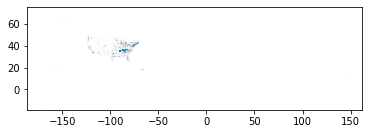

In [31]:
tnmetro.plot()

In [35]:
tnmetro.dropna(subset = ['yearly_sunlight_kwh_total'], inplace=True)

In [37]:
tnmetro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 713 entries, 345 to 3172
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   UACE10                                713 non-null    object  
 1   GEOID10                               713 non-null    object  
 2   NAME10                                713 non-null    object  
 3   NAMELSAD10                            713 non-null    object  
 4   LSAD10                                713 non-null    object  
 5   MTFCC10                               713 non-null    object  
 6   UATYP10                               713 non-null    object  
 7   FUNCSTAT10                            713 non-null    object  
 8   ALAND10                               713 non-null    int64   
 9   AWATER10                              713 non-null    int64   
 10  INTPTLAT10                            713 non-null    object  
